In [1]:
import os
import pandas as pd
#################################### Importation de toutes les data qui contient les variables et la colonnes DATA ###########################

# Spécifiez le chemin du répertoire contenant les fichiers CSV
chemin_dossier =  "data/DatasetsML"

# Définissez les abréviations et les noms des fichiers CSV
abreviations = {
    'mortgage_15yr': '15-Year Fixed Rate Mortgage Average.csv',
    'mortgage_30yr': '30-Year Fixed Rate Mortgage Average.csv',
    'cpi': 'Consumer Price Index.csv',
    'gdp': 'Gross_Domestic_Product.csv',
    'home_price_index': 'Home Price Index.csv',
    'monthly_supply_houses': 'Monthly Supply of New Houses.csv',
    'personal_income': 'Personal Income.csv',
    'population': 'Population.csv',
    'total_construction': 'Total Construction in the United States.csv',
    'unemployment_rate': 'Unemployment Rate - 20 Yrs. & over.csv'
}

# Créez un dictionnaire pour stocker les DataFrames et les noms de fichiers CSV
dataframes = {}

# Parcourez les abréviations et les noms de fichiers
for abreviation, nom_fichier in abreviations.items():
    # Obtenez le chemin complet du fichier CSV
    chemin_fichier = os.path.join(chemin_dossier, nom_fichier)
    
    # Vérifiez si le fichier existe
    if os.path.exists(chemin_fichier):
        # Importez le fichier CSV en tant que DataFrame et stockez-le dans le dictionnaire
        dataframes[abreviation] = pd.read_csv(chemin_fichier)
        print(f"Le fichier {nom_fichier} a été importé avec succès.")
    else:
        print(f"Le fichier {nom_fichier} n'existe pas dans le répertoire.")

# Affichez le dictionnaire contenant les DataFrames et les noms de fichiers CSV
print("\nDictionnaire des DataFrames importés :")
for abreviation, df in dataframes.items():
    nom_fichier = abreviations[abreviation]  # Accéder au nom du fichier à partir du dictionnaire d'abréviations
    print(f"{abreviation} ({nom_fichier}):")
    print(df.info())






Le fichier 15-Year Fixed Rate Mortgage Average.csv a été importé avec succès.
Le fichier 30-Year Fixed Rate Mortgage Average.csv a été importé avec succès.
Le fichier Consumer Price Index.csv a été importé avec succès.
Le fichier Gross_Domestic_Product.csv a été importé avec succès.
Le fichier Home Price Index.csv a été importé avec succès.
Le fichier Monthly Supply of New Houses.csv a été importé avec succès.
Le fichier Personal Income.csv a été importé avec succès.
Le fichier Population.csv a été importé avec succès.
Le fichier Total Construction in the United States.csv a été importé avec succès.
Le fichier Unemployment Rate - 20 Yrs. & over.csv a été importé avec succès.

Dictionnaire des DataFrames importés :
mortgage_15yr (15-Year Fixed Rate Mortgage Average.csv):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DATE          391 non-null

In [2]:
import pandas as pd

dataframes["cpi"].info() ### Cette data CPI ne contient pas colonne DATA et existe probleme de separation de colonnes 
#Year,"Period","Consumer Price Index","Over-the-Year Percent Change","Over-the-Month Percent Change"

##############################  Résolution de probleme et cree data CPI selon notre besoin DATA CPI    ####################################

# Afficher les noms des colonnes du DataFrame "cpi"
print(dataframes["cpi"].columns)

# Chemin vers le fichier CSV
chemin_fichier = "data\\DatasetsML\\Consumer Price Index.csv"

# Lire le fichier CSV en utilisant la première ligne comme noms de colonnes
df = pd.read_csv(chemin_fichier, sep=",", header=0)

# Séparer chaque élément de la colonne en fonction du délimiteur ","
nouvelles_colonnes = df.columns[0].split(",")

# Créer une nouvelle DataFrame avec les colonnes divisées
df_cpi= pd.DataFrame(columns=nouvelles_colonnes)

# Ajouter les données à la nouvelle DataFrame en utilisant les éléments séparés
for index, row in df.iterrows():
    valeurs = row[0].split(",")
    df_cpi.loc[index] = valeurs

############## Formater DATE en utilisant year period et eliminer les autres colonnes #####################

#Renomer les colonnes 

df_cpi.rename(columns={'"Year"': 'Year', '"Period"': 'Period', '"Consumer Price Index"': 'Consumer Price Index'}, inplace=True)

# Remove the quotation marks from the "Consumer Price Index" column
df_cpi['Consumer Price Index'] = df_cpi['Consumer Price Index'].str.replace('"', '')

# Now, let's convert the "Consumer Price Index" column to float
df_cpi['Consumer Price Index'] = df_cpi['Consumer Price Index'].astype(float)

print(df_cpi.head())



# Supprimer les colonnes "Over-the-Year Percent Change" et "Over-the-Month Percent Change"
df_cpi = df_cpi.drop(['"Over-the-Year Percent Change"', '"Over-the-Month Percent Change"'], axis=1)

# Création d'un dictionnaire pour mapper les mois aux nombres correspondants
month_dict = {
    "January": "01",
    "February": "02",
    "March": "03",
    "April": "04",
    "May": "05",
    "June": "06",
    "July": "07",
    "August": "08",
    "September": "09",
    "October": "10",
    "November": "11",
    "December": "12"
}

# Remplacer les noms de mois par les nombres correspondants dans la colonne "Period"
df_cpi['Period'] = df_cpi['Period'].str.replace('"', '').map(month_dict)

# Création de la colonne DATE
df_cpi['DATE'] = df_cpi['Year'].astype(str) + '-' + df_cpi['Period'] + '-01'

# Supprimer les colonnes inutiles
df_cpi = df_cpi.drop(['Year', 'Period'], axis=1)

# Renommer les colonnes
df_cpi = df_cpi.rename(columns={"Consumer Price Index": "CPI"})
print(df_cpi.columns)
print(df_cpi.head())

#Ajouter  la data traité a dataframes qui content toutes les variables 
dataframes['cpi']=df_cpi

# Afficher le dataframe final
print(dataframes['cpi'])







<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 1 columns):
 #   Column                                                                                               Non-Null Count  Dtype 
---  ------                                                                                               --------------  ----- 
 0   Year,"Period","Consumer Price Index","Over-the-Year Percent Change","Over-the-Month Percent Change"  926 non-null    object
dtypes: object(1)
memory usage: 7.4+ KB
Index(['Year,"Period","Consumer Price Index","Over-the-Year Percent Change","Over-the-Month Percent Change"'], dtype='object')


C:\Users\H P\AppData\Local\Temp\ipykernel_2604\3772877624.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  valeurs = row[0].split(",")
C:\Users\H P\AppData\Local\Temp\ipykernel_2604\3772877624.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  valeurs = row[0].split(",")
C:\Users\H P\AppData\Local\Temp\ipykernel_2604\3772877624.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  valeurs = row[0].split(",")
C:\Users\H P\AppDat

   Year      Period  Consumer Price Index "Over-the-Year Percent Change"  \
0  2024  "February"                 311.1                         "3.2%"   
1  2024   "January"                 309.7                         "3.1%"   
2  2023  "December"                 308.9                         "3.3%"   
3  2023  "November"                 307.9                         "3.1%"   
4  2023   "October"                 307.6                         "3.2%"   

  "Over-the-Month Percent Change"  
0                          "0.4%"  
1                          "0.3%"  
2                          "0.3%"  
3                          "0.1%"  
4                          "0.0%"  
Index(['CPI', 'DATE'], dtype='object')
     CPI        DATE
0  311.1  2024-02-01
1  309.7  2024-01-01
2  308.9  2023-12-01
3  307.9  2023-11-01
4  307.6  2023-10-01
       CPI        DATE
0    311.1  2024-02-01
1    309.7  2024-01-01
2    308.9  2023-12-01
3    307.9  2023-11-01
4    307.6  2023-10-01
..     ...         ...
9

C:\Users\H P\AppData\Local\Temp\ipykernel_2604\3772877624.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  valeurs = row[0].split(",")
C:\Users\H P\AppData\Local\Temp\ipykernel_2604\3772877624.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  valeurs = row[0].split(",")
C:\Users\H P\AppData\Local\Temp\ipykernel_2604\3772877624.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  valeurs = row[0].split(",")
C:\Users\H P\AppDat

In [3]:
#################### Lors de convertion de objet a float j'avais des problem d'ou code de detection #######################

def find_problematic_columns(dataframes):
    problematic_columns = {}
    for key, df in dataframes.items():
        problematic_cols = []
        for col in df.columns:
            if col != 'DATE':
                try:
                    df[col] = df[col].astype(float)
                except ValueError:
                    problematic_cols.append(col)
        if problematic_cols:
            problematic_columns[key] = problematic_cols
    return problematic_columns

# Trouver les colonnes problématiques
problematic_columns = find_problematic_columns(dataframes)
# Afficher les colonnes problématiques
for key, cols in problematic_columns.items():
    print(f"Dataframe '{key}': Colonnes problématiques: {', '.join(cols)}")


Dataframe 'mortgage_15yr': Colonnes problématiques: MORTGAGE15US
Dataframe 'mortgage_30yr': Colonnes problématiques: MORTGAGE30US


In [4]:
################# changer le type des colonnes explicative d'objet a float ###########################


def transform_dataframes(dataframes):
    for key, df in dataframes.items():
        # Convertir les valeurs en float avec astype(float), en remplissant les erreurs avec 0
        for col in df.columns:
            if col != 'DATE':  # Ignorer la colonne 'DATE'
                df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
        
        # Réassigner le dataframe modifié
        dataframes[key] = df

    return dataframes


transformed_dataframes = transform_dataframes(dataframes)

# Afficher les dataframes transformés
for key, df in dataframes.items():
    print(f"Dataframe: {key}")
    print(df.info())
    print()


Dataframe: mortgage_15yr
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          391 non-null    object 
 1   MORTGAGE15US  391 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.2+ KB
None

Dataframe: mortgage_30yr
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          636 non-null    object 
 1   MORTGAGE30US  636 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.1+ KB
None

Dataframe: cpi
<class 'pandas.core.frame.DataFrame'>
Index: 926 entries, 0 to 925
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CPI     926 non-null    float64
 1   DATE    926 non-null    object 
dtypes: float64(1),

In [5]:
################################# Pour CPI ona 1982-1984 = 100 comme reference pour notre dataset on considere la reference 2000=100##############
##############Ajuster le CPI pour quil soit compatible avec la reference de HPI valeurs a expliqué ################################
abreviations = {
    'mortgage_15yr': '15-Year Fixed Rate Mortgage Average.csv',
    'mortgage_30yr': '30-Year Fixed Rate Mortgage Average.csv',
    'cpi': 'Consumer Price Index.csv',
    'gdp': 'Gross_Domestic_Product.csv',
    'home_price_index': 'Home Price Index.csv',
    'monthly_supply_houses': 'Monthly Supply of New Houses.csv',
    'personal_income': 'Personal Income.csv',
    'population': 'Population.csv',
    'total_construction': 'Total Construction in the United States.csv',
    'unemployment_rate': 'Unemployment Rate - 20 Yrs. & over.csv'
}
"""Pour changer l'année de référence du Consumer Price Index (CPI) de 1983-08-01 à 2000-01-01 = 100, 
vous devez calculer un facteur de conversion en utilisant les valeurs CPI des deux dates de référence. Voici comment vous pouvez procéder :

Trouver la valeur CPI correspondant à la date de référence actuelle (1983-08-01).
Trouver la valeur CPI correspondant à la nouvelle date de référence (2000-01-01).
Calculer le facteur de conversion en divisant la valeur CPI de la nouvelle date de référence par la valeur CPI de la date de référence actuelle.
Multiplier toutes les valeurs CPI par ce facteur de conversion pour ajuster les valeurs CPI à la nouvelle année de référence."""
cpi=dataframes['cpi']

# Trouver l'index de l'entrée correspondant à la date de référence actuelle (1983-08-01)
current_reference_index = cpi[cpi['DATE'] == '1983-08-01'].index[0]
# Trouver la valeur CPI à la date de référence actuelle
current_reference_cpi = cpi.loc[current_reference_index, 'CPI']

# Trouver l'index de l'entrée correspondant à la nouvelle date de référence (2000-01-01)
new_reference_index = cpi[cpi['DATE'] == '2000-01-01'].index[0]
# Trouver la valeur CPI à la nouvelle date de référence
new_reference_cpi = cpi.loc[new_reference_index, 'CPI']

# Calculer le facteur de conversion
conversion_factor = 100 / new_reference_cpi

# Ajuster toutes les valeurs CPI en utilisant le facteur de conversion
cpi['Adjusted CPI'] = cpi['CPI'] * conversion_factor

# Imprimer la valeur ajustée du CPI pour la nouvelle date de référence
adjusted_cpi_2000 = cpi.loc[new_reference_index, 'Adjusted CPI']
print("Adjusted CPI for 2000-01-01:", adjusted_cpi_2000)

print(cpi[['Adjusted CPI']])
print("Valeur du CPI avant ajustement pour l'ancienne année de référence (1983-08-01):", current_reference_cpi)
print("Valeur du CPI après ajustement pour l'ancienne année de référence (1983-08-01):", cpi.loc[current_reference_index, 'Adjusted CPI'])
print("\nValeur du CPI avant ajustement pour la nouvelle année de référence (2000-01-01):", new_reference_cpi)
print("Valeur du CPI après ajustement pour la nouvelle année de référence (2000-01-01):", cpi.loc[new_reference_index, 'Adjusted CPI'])


print("conversion_factor",conversion_factor)


Adjusted CPI for 2000-01-01: 100.0
     Adjusted CPI
0      183.756645
1      182.929711
2      182.457177
3      181.866509
4      181.689309
..            ...
921     12.994684
922     12.994684
923     12.994684
924     12.758417
925     12.699350

[926 rows x 1 columns]
Valeur du CPI avant ajustement pour l'ancienne année de référence (1983-08-01): 100.1
Valeur du CPI après ajustement pour l'ancienne année de référence (1983-08-01): 59.12581216774955

Valeur du CPI avant ajustement pour la nouvelle année de référence (2000-01-01): 169.3
Valeur du CPI après ajustement pour la nouvelle année de référence (2000-01-01): 100.0
conversion_factor 0.5906674542232723


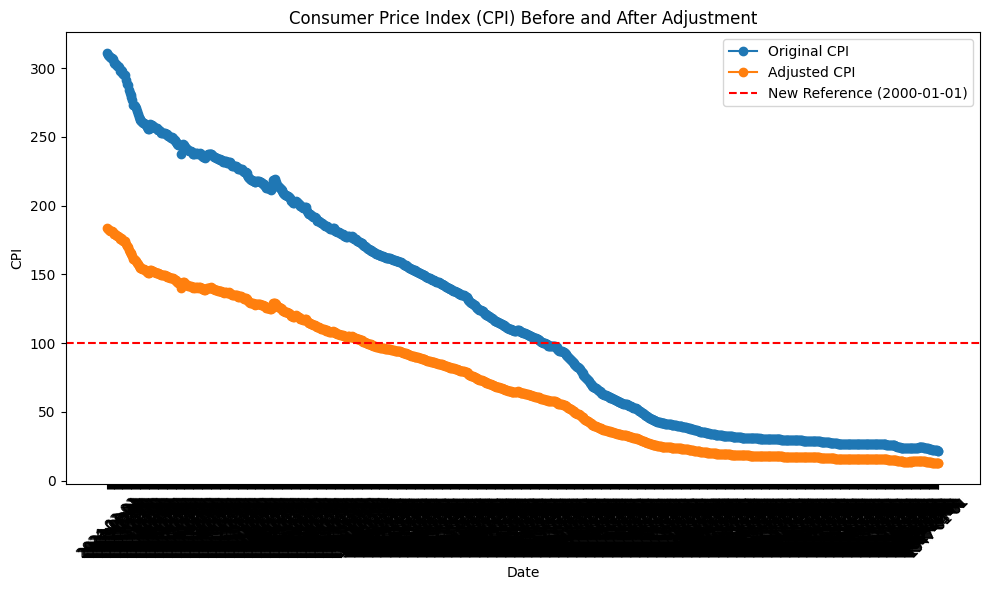

In [6]:
import matplotlib.pyplot as plt

# Tracer les valeurs originales du CPI
plt.figure(figsize=(10, 6))
plt.plot(cpi['DATE'], cpi['CPI'], label='Original CPI', marker='o', linestyle='-')

# Tracer les valeurs ajustées du CPI
plt.plot(cpi['DATE'], cpi['Adjusted CPI'], label='Adjusted CPI', marker='o', linestyle='-')

# Marquer la nouvelle date de référence avec une ligne horizontale
plt.axhline(y=100, color='r', linestyle='--', label='New Reference (2000-01-01)')

# Ajouter des titres et des légendes
plt.title('Consumer Price Index (CPI) Before and After Adjustment')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.xticks(rotation=45)
plt.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
###################################### Regrouper les datase par DATE dans une seul dataframes 
# Concaténer toutes les DataFrames de la liste dataframes
merged_df = pd.concat(dataframes, ignore_index=True)

# Convertir la colonne 'DATE' en type de données datetime si elle n'est pas déjà convertie
merged_df['DATE'] = pd.to_datetime(merged_df['DATE'])

# Regrouper les données par la colonne 'DATE'
grouped_df = merged_df.groupby('DATE').sum().reset_index()

# Afficher les premières lignes du DataFrame regroupé
print(grouped_df.tail())
print(merged_df.tail())

grouped_df.to_excel('data\\test.xlsx', index=False)




          DATE  MORTGAGE15US  MORTGAGE30US    CPI  Adjusted CPI  GDP  \
922 2023-11-01        6.7660        7.4420  307.9    181.866509  0.0   
923 2023-12-01        6.1375        6.8150  308.9    182.457177  0.0   
924 2024-01-01        5.8700        6.6425  309.7    182.929711  0.0   
925 2024-02-01        6.1020        6.7760  311.1    183.756645  0.0   
926 2024-03-01        0.0000        0.0000    0.0      0.000000  0.0   

     CSUSHPISA  MSACSR       PI    POPTHM    TTLCONS  LNS14000024  
922    313.648     8.9  23306.8  335925.0  2082923.0          3.4  
923    314.259     8.3  23381.7  336070.0  2105791.0          3.4  
924      0.000     8.3  23615.4  336194.0  2102434.0          3.4  
925      0.000     0.0      0.0       0.0        0.0          3.5  
926      0.000     0.0      0.0       0.0        0.0          0.0  
           DATE  MORTGAGE15US  MORTGAGE30US  CPI  Adjusted CPI  GDP  \
6282 2023-10-01           NaN           NaN  NaN           NaN  NaN   
6283 2023-11-01  

In [8]:
# Définir le dictionnaire de mapping des noms de colonnes
dataframes_info = {
    'MORTGAGE15US': 'Mortgage_15yr',
    'MORTGAGE30US': 'Mortgage_30yr',
    'CPI': 'Consumer price index',
    'GDP': 'Gross Domestic Product',
    'CSUSHPISA': 'Home_price_index',
    'MSACSR': 'Monthly_supply_houses',
    'PI': 'Personal_income',
    'POPTHM': 'Population',
    'TTLCONS': 'Total_construction',
    'LNS14000024': 'Unemployment_rate'
}


df=grouped_df.copy()


# Remplacer les noms de colonnes dans la DataFrame avec les nouveaux noms
df.rename(columns=dataframes_info, inplace=True)

# Supprimer la colonne 'Consumer price index'
df.drop(columns=['Consumer price index'], inplace=True)

# Convertir la colonne 'DATE' en datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Afficher les premières lignes de la DataFrame pour vérification
print(df.tail())





          DATE  Mortgage_15yr  Mortgage_30yr  Adjusted CPI  \
922 2023-11-01         6.7660         7.4420    181.866509   
923 2023-12-01         6.1375         6.8150    182.457177   
924 2024-01-01         5.8700         6.6425    182.929711   
925 2024-02-01         6.1020         6.7760    183.756645   
926 2024-03-01         0.0000         0.0000      0.000000   

     Gross Domestic Product  Home_price_index  Monthly_supply_houses  \
922                     0.0           313.648                    8.9   
923                     0.0           314.259                    8.3   
924                     0.0             0.000                    8.3   
925                     0.0             0.000                    0.0   
926                     0.0             0.000                    0.0   

     Personal_income  Population  Total_construction  Unemployment_rate  
922          23306.8    335925.0           2082923.0                3.4  
923          23381.7    336070.0           210

In [10]:
########################### Ajuter les unite de la dataframes #################################

import pandas as pd

# Conversion des unités :

# Convertir la population en milliers
df['Population'] *= 1000  
# Exemple : Si la valeur d'origine était 10, cela la convertirait en 10 000.

# Convertir le PIB en dollars (milliards)
df['Gross Domestic Product'] *= 100000000


# Convertir la construction totale en dollars (millions)
df['Total_construction'] *= 1000000 

#
df['Personal_income'] *= 1000000000


# Afficher le DataFrame après conversion
print(df.tail())

df.to_csv('data\\DATA_collecté.csv', index=False)

          DATE  Mortgage_15yr  Mortgage_30yr  Adjusted CPI  \
922 2023-11-01         6.7660         7.4420    181.866509   
923 2023-12-01         6.1375         6.8150    182.457177   
924 2024-01-01         5.8700         6.6425    182.929711   
925 2024-02-01         6.1020         6.7760    183.756645   
926 2024-03-01         0.0000         0.0000      0.000000   

     Gross Domestic Product  Home_price_index  Monthly_supply_houses  \
922                     0.0           313.648                    8.9   
923                     0.0           314.259                    8.3   
924                     0.0             0.000                    8.3   
925                     0.0             0.000                    0.0   
926                     0.0             0.000                    0.0   

     Personal_income    Population  Total_construction  Unemployment_rate  
922     2.330680e+22  3.359250e+11        2.082923e+18                3.4  
923     2.338170e+22  3.360700e+11        